In [18]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt


In [19]:
df = snb.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
df_working = df.copy()
df_working.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
df_working['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
df_working["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [23]:
df.groupby(["sex","pclass"]).agg({"age":"mean", "fare":"mean", "survived":"sum"}).reset_index()

,sex,pclass,age,fare,survived
0,female,1,34.611765,106.125798,91
1,female,2,28.722973,21.970121,70
2,female,3,21.750000,16.118810,72
3,male,1,41.281386,67.226127,45
4,male,2,30.740707,19.741782,17
5,male,3,26.507589,12.661633,47


In [24]:
grouped_results = df_working.groupby(["sex","pclass"]).agg({"age":"mean", "fare":"mean", "survived":"sum"}).reset_index()
grouped_results

,sex,pclass,age,fare,survived
0,female,1,34.611765,106.125798,91
1,female,2,28.722973,21.970121,70
2,female,3,21.750000,16.118810,72
3,male,1,41.281386,67.226127,45
4,male,2,30.740707,19.741782,17
5,male,3,26.507589,12.661633,47


In [25]:
df_working["age"].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [26]:
df_working["age"].isnull().value_counts()

age
False    714
True     177
Name: count, dtype: int64

In [39]:
age_m = int(df_working['age'].mean())
df_working.fillna({"age":int(age_m)}, inplace=True)
df_working["age"]
#print(age_m)



0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [40]:
labels =  ['Kind', 'Teenager', 'Erwachsener', 'Senior']
einteilung = [0, 12, 18, 60, 100]
df_working["age_group"] = pd.cut(df_working["age"], bins=einteilung, labels=labels, right=False)
df_working[["age", "age_group"]].head(10)

,age,age_group
0,22.000000,Erwachsener
1,38.000000,Erwachsener
2,26.000000,Erwachsener
3,35.000000,Erwachsener
4,35.000000,Erwachsener
5,29.699118,Erwachsener
6,54.000000,Erwachsener
7,2.000000,Kind
8,27.000000,Erwachsener
9,14.000000,Teenager


In [46]:
#df_working.groupby("age_group",observed=False).agg({"survived":"sum"})
survived_by_age_group = df_working.groupby("age_group",observed=False)["survived"].value_counts(normalize=True).unstack()
survived_by_age_group

survived,0,1
age_group,,
Kind,0.426471,0.573529
Teenager,0.511111,0.488889
Erwachsener,0.635638,0.364362
Senior,0.730769,0.269231


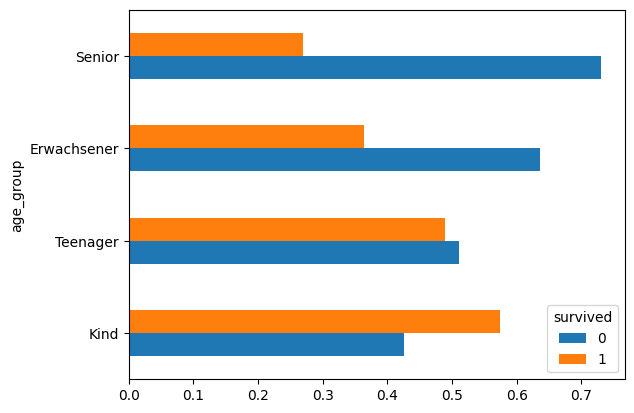

In [48]:
survived_by_age_group.plot(kind='barh')
plt.show()